In [1]:
from rdflib.graph import Graph
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import psutil

/home/jehiannormansaviero/environments/reiva5/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[(1, 3), (1, 5)]


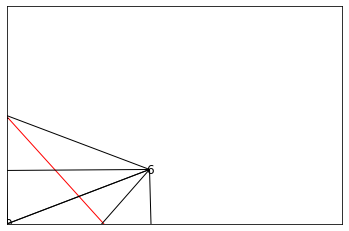

In [2]:
from networkx.algorithms.approximation.steinertree import steiner_tree
import networkx as nx

G = nx.Graph()
G.add_nodes_from([x for x in range(7)])
for u in range(7):
    for v in range(u+1, 7):
        G.add_edge(u,v)

res = steiner_tree(G, [1, 3, 5])
pos = nx.spring_layout(G, scale=0.5)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=res.edges, edge_color='r', arrows=True)
other = []
for x in G.edges:
    if x not in res.edges:
        other.append(x)
nx.draw_networkx_edges(G, pos, edgelist=other, arrows=False)
print(res.edges)
plt.show()

# Useful Method

In [3]:
%%time
# Parse URL into readable information
def getDesc(s):
    curr = -1
    while s.find("/", curr+1) != -1:
        curr = s.find("/", curr+1)
    return s[curr+1:]

hash_table = dict()
value_table = []
last_hash_value = 0

# Doing hash
def encryptHash(s):
    global hash_table
    return hash_table[s]

def decrpytHash(val):
    global value_table
    return value_table[val]

def doHash(s):
    global hash_table
    global last_hash_value
    if s not in hash_table:
        hash_table[s] = last_hash_value
        value_table.append(s)
        last_hash_value += 1

CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 13.8 µs


# Global Variables

In [4]:
WordToLink = dict() # To compress link into simple string
simple_rdfg = dict() #
full_rdfg = dict()
edge_names = dict()
anti_full_rdfg = dict()
vertices_at_edge = dict()
class_type = set()

# Constants

In [5]:
classOf = "22-rdf-syntax-ns#type"
typeOf = "type"
subClassOf = "rdf-schema#subClassOf"
base_path = "/home/jehiannormansaviero/tugas-akhir/tugas-akhir/"
folder_data = "data/"
data_path = base_path + folder_data
folders = [f for f in listdir(data_path) if not isfile(join(data_path, f))]

# Read RDF Graph

## Read RDF Graph from nt file

In [ ]:
%%time

folders = [f for f in listdir(data_path) if not isfile(join(data_path, f))]

for folder_name in tqdm(folders):
    folder_path = data_path + folder_name + "/"
    files = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
    for file_name in tqdm(files):
        file_path = folder_data + folder_name +  "/" + file_name
        g = Graph()
        try:
            result = g.parse(file_path, format="nt")
            G = rdflib_to_networkx_multidigraph(result)
        except:
            print("Gagal di %s" % (file_name))
            continue

        for stmt in result:
            u, edge, v = [getDesc(x).lower() for x in stmt]
            if u not in WordToLink:
                WordToLink[u] = set()
            WordToLink[u].add(stmt[0])

            if edge not in WordToLink:
                WordToLink[edge] = set()
            WordToLink[edge].add(stmt[1])

            if v[:4] == "http":
                if v not in WordToLink:
                    WordToLink[v] = set()
                WordToLink[v].add(stmt[2])

    #         doHash(u)
    #         doHash(edge)
    #         doHash(v)

    #         u = encryptHash(u)
    #         edge = encryptHash(edge)
    #         v = encryptHash(v)

            if u not in simple_rdfg:
                simple_rdfg[u] = set()
            simple_rdfg[u].add(v)

            if u not in edge_names:
                full_rdfg[u] = dict()
                edge_names[u] = dict()

            if v not in anti_full_rdfg:
                anti_full_rdfg[v] = dict()
            edge_names[u][v] = edge

            if edge not in anti_full_rdfg[v]:
                anti_full_rdfg[v][edge] = set()
            anti_full_rdfg[v][edge].add(u)

            if edge not in full_rdfg[u]:
                full_rdfg[u][edge] = set()
            full_rdfg[u][edge].add(v)

            if edge not in vertices_at_edge:
                vertices_at_edge[edge] = []
            vertices_at_edge[edge].append([u,v])

            if edge == classOf:
                class_type.add(v)
        

# Plot Networkx instance of RDF Graph
# pos = nx.spring_layout(G, scale=4)
# edge_labels = nx.get_edge_attributes(G, 'r')
# nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
# nx.draw(G, with_labels=True)

  0%|          | 0/1 [00:00<?, ?it/s]

## Get the RDF Graph

In [14]:
%%time
class_type

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


{'_feature',
 'academicjournal',
 'activity',
 'actor',
 'administrativearea',
 'administrativeregion',
 'adultactor',
 'agent',
 'aircraft',
 'airline',
 'airport',
 'album',
 'amateurboxer',
 'ambassador',
 'americanfootballleague',
 'americanfootballplayer',
 'americanfootballteam',
 'amphibian',
 'anatomicalstructure',
 'animal',
 'animangacharacter',
 'anime',
 'arachnid',
 'archaea',
 'architect',
 'architecturalstructure',
 'artery',
 'artist',
 'artistdiscography',
 'artwork',
 'astronaut',
 'athlete',
 'australianfootballleague',
 'australianrulesfootballplayer',
 'automobile',
 'automobileengine',
 'autoracingleague',
 'award',
 'bacteria',
 'badmintonplayer',
 'band',
 'baseballleague',
 'baseballplayer',
 'basketballleague',
 'basketballplayer',
 'basketballteam',
 'beachvolleyballplayer',
 'beautyqueen',
 'beverage',
 'biologicaldatabase',
 'biomolecule',
 'bird',
 'bodybuilder',
 'bodyofwater',
 'bone',
 'book',
 'boxer',
 'brain',
 'bridge',
 'britishroyalty',
 'broadcas

# Create Structural Summary Graph

In [ ]:
%%time
structural_summary = nx.Graph()
defined_edges = dict()
property_edges = set()

for u, edges in tqdm(full_rdfg.items()):
    if classOf in edges:
        for current_class in edges[classOf]:
            if current_class == "owl#thing": continue
            for edge, vs in edges.items():
                if edge != classOf and edge != typeOf:
                    for v in vs:
                        if u == v : continue
                        if v in full_rdfg and classOf in full_rdfg[v]:
                            for target_class in full_rdfg[v][classOf]:
                                if target_class == current_class: continue
                                if target_class == "owl#thing": continue
                                if current_class not in defined_edges:
                                    defined_edges[current_class] = dict()
                                defined_edges[current_class][target_class] = edge
                                property_edges.add(edge)
                                structural_summary.add_edge(current_class, target_class)

In [ ]:
print(full_rdfg["zhai_zhigang"])

# Read Keyword to Analyze

In [ ]:
file_name = 'input.in'
f = open(file_name)
keyword = []
for line in f:
    keyword.extend([' '.join(x.lower().split('_')) for x in line.strip().split()])
keyword

# Get Matching Construct

In [ ]:
def get_class_matching_construct(word):
    if word in class_type:
        return [[word]]
    return []

def get_value_matching_construct(word):
    res = set()
    for key in anti_full_rdfg:
        if word in key:
            for edge in anti_full_rdfg[key]:
                for node in anti_full_rdfg[key][edge]:
                    if classOf in full_rdfg[node]:
                        for current_class in full_rdfg[node][classOf]:
                            if current_class != "owl#thing": res.add(current_class)
    return [[x] for x in res]

def get_relationship_matching_construct(word):
    res = set()
    if word in vertices_at_edge:
        for u, v in vertices_at_edge[word]:
            if classOf in full_rdfg[u]:
                for current_class in full_rdfg[u][classOf]:
                    if current_class == "owl#thing": continue
                    if v in full_rdfg and classOf in full_rdfg[v]:
                        for target_class in full_rdfg[v][classOf]:
                            if target_class != "owl#thing": res.add((current_class, target_class))
    return [[a, b] for a, b in res]

def get_property_matching_construct(word):
    res = set()
    if word in vertices_at_edge:
        for u, v in vertices_at_edge[word]:
            if classOf in full_rdfg[u]:
                for current_class in full_rdfg[u][classOf]:
                    if current_class != "owl#thing": res.add(current_class)
    return [[x] for x in res]

In [ ]:
%%time
for word in tqdm(keyword):
    print('List of matching construct of word: ' + word)
    print('> Class matching construct: ' + str(get_class_matching_construct(word)))
    print('> Property matching construct: ' + str(get_property_matching_construct(word)))
    print('> Value matching construct: ' + str(get_value_matching_construct(word)))
    print('> Relationship matching construct: ' + str(get_relationship_matching_construct(word)))

In [ ]:
for u, v in tas_graph.edges:
    print(u, v)

# Read Profile Graph

In [25]:
# from http://codereview.stackexchange.com/questions/1526/finding-all-k-subset-partitions

filename = "graph-profile.txt"
profile_graph_classes = []
profile_graph = set()
for line in open(filename):
    u, edge, v = [' '.join(getDesc(x).lower().split('_')) for x in line.strip().split()]
    profile_graph.add((u, edge, v))
    if edge == "type":
        profile_graph_classes.append(v)

profile_graph_classes.sort()
profile_graph_classes
# Plot Networkx instance of RDF Graph
# pos = nx.spring_layout(G, scale=4)
# edge_labels = nx.get_edge_attributes(G, 'r')
# nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
# nx.draw(G, with_labels=True)

['country', 'person']

In [26]:
def nearSimilar(a, b):
    i = 0
    j = 0
    cnt = 0
    while i < len(a) and j < len(b):
        if a[i] == b[j]:
            cnt += 1
            i += 1
            j += 1
        elif a[i] < b[j]:
            i += 1
        else:
            j += 1
    return cnt >= 0.8 * len(b)

# Find Pattern Graph

## Create Steiner Tree

In [27]:
%%time

result_steiner_tree = []
terminal_node = []
for word in tqdm(keyword):
    tmp = []
    tmp.extend(get_class_matching_construct(word))
    tmp.extend(get_property_matching_construct(word))
    tmp.extend(get_value_matching_construct(word))
    tmp.extend(get_relationship_matching_construct(word))
    terminal_node.append(tmp)

ids = [0 for _ in keyword]
process_terminals = set()
result_graphs = set()

def recur(depth):
    global ids
    global terminal_node
    global result_graphs
    if depth == len(ids):
        class_member = []
        for i in range(len(ids)):
            if ids[i] != -1:
                class_member.extend(terminal_node[i][ids[i]])
        class_member.sort()
        if nearSimilar(class_member, profile_graph_classes):
            process_terminals.add(tuple(set(class_member)))
#         result_graphs.add(steiner_tree(structural_summary, list(set(class_member))))
    else:
        awal = -1
        if len(terminal_node[depth]) != 0:
            awal = 0
        for i in range(awal,len(terminal_node[depth])):
            ids[depth] = i
            recur(depth+1)

recur(0)
# for result_graph in tqdm(result_graphs):
#     for u, v in result_graph.edges:
#         if u in defined_edges and v in defined_edges[u]:
#             print(u, ' ', defined_edges[u][v], ' ', v)
#         else:
#             print(v, ' ', defined_edges[v][u], ' ', u)
#     print('done')

100%|██████████| 2/2 [00:07<00:00,  4.05s/it]

CPU times: user 7.87 s, sys: 15 µs, total: 7.87 s
Wall time: 7.87 s


In [28]:
print(len(process_terminals))
i = 0
for x in process_terminals:
    if i < 25:
        print(x)
        i += 1
    else:
        break

1
('country', 'person')


In [29]:
%%time
result_graphs = set()
for x in tqdm(process_terminals):
    print(x)
    result_graphs.add(steiner_tree(structural_summary, list(x)))

  0%|          | 0/1 [00:00<?, ?it/s]

('country', 'person')


100%|██████████| 1/1 [00:23<00:00, 23.77s/it]

CPU times: user 23.7 s, sys: 55.8 ms, total: 23.8 s
Wall time: 23.8 s


In [33]:
result_graphs_converted =  []
for x in result_graphs:
    tmp_graphs = []
    for y in x.edges:
        if y[0] in defined_edges and y[1] in defined_edges[y[0]]:
            tmp_graphs.append((y[0], defined_edges[y[0]][y[1]], y[1]))
        if y[1] in defined_edges and y[0] in defined_edges[y[1]]:
            tmp_graphs.append((y[1], defined_edges[y[1]][y[0]], y[0]))
    result_graphs_converted.append(tmp_graphs)
result_graphs_converted

[[('country', 'leadername', 'person'), ('person', 'birthplace', 'country')]]

## Get Pattern Graph from Steiner Tree

In [ ]:
%%time
result_pattern_graph = set()
property_member = dict()

def recur_get_entity(depth):
    global class_members
    global result_pattern_graph
    global result_graph
    if depth == len(class_members):
#         print(translator)
        valid = True
        tmp_graph = []
        for u, v in result_graph.edges:
            if u not in defined_edges or v not in defined_edges[u]:
                u, v = v, u
            if translator[u] not in edge_names or translator[v] not in edge_names[translator[u]]:
                valid = False
            if not valid:
                break
            else:
                tmp_graph.append((translator[u], edge_names[translator[u]][translator[v]], translator[v]))
        if valid:
            for u in class_members:
                tmp_graph.append((translator[u], classOf, u))
                tmp_graph.append((translator[u], property_member[u], "$set"))
            result_pattern_graph.add(tuple(tmp_graph))
    else:
        for member in anti_full_rdfg[class_members[depth]][classOf]:
            translator[class_members[depth]] = member
            for edge in full_rdfg[member]:
                if edge != classOf and edge != typeOf and edge not in property_edges:
                    property_member[class_members[depth]] = edge
                    recur_get_entity(depth+1)
    
for result_graph in tqdm(result_graphs):
    class_members = set()
    translator = dict()
    for u, v in result_graph.edges:
        translator[u] = ""
        translator[v] = ""
        class_members.add(u)
        class_members.add(v)
    class_members = list(class_members)
#     print(class_members)
    recur_get_entity(0)
    
result_pattern_graph = list(result_pattern_graph)
result_pattern_graph

# Find Graph Profile match Graph Pattern

## Measuring Similarity Between Pattern and Profile Graph

### Extrinsic Similarity

#### Concept Similarity

In [ ]:
def cs(P, U):
    class_member_p = set()
    class_member_u = set()
    both = 0
    for u, edge, v in P:
        if edge == classOf or edge == typeOf:
            class_member_p.add(v)
    for u, edge, v in U:
        if edge == classOf or edge == typeOf:
            class_member_u.add(v)
            if v in class_member_p:
                both += 1
    print(class_member_p)
    print(class_member_u)
    return (both)/(len(class_member_p) + len(class_member_u) - both)

cs(result_pattern_graph[0], result_pattern_graph[1])

#### Relationship Similarity

In [ ]:
def rs(P, U):
    tuple_member_p = set()
    tuple_member_u = set()
    both = 0
    node_class_naming_p = dict()
    node_class_naming_u = dict()
#     print('> ' + str(P))
#     print('> ' + str(U))
    for u, edge, v in P:
        if edge == classOf or edge == typeOf:
            node_class_naming_p[u] = v
    for u, edge, v in U:
        if edge == classOf or edge == typeOf:
            node_class_naming_u[u] = v
    
#     print(node_class_naming_p)
#     print(node_class_naming_u)
    for u, edge, v in P:
        if edge != classOf and edge != typeOf and v in node_class_naming_p and v != "$set" and u in node_class_naming_p:
            tuple_member_p.add((node_class_naming_p[u], edge, node_class_naming_p[v]))
    for u, edge, v in U:
#         print(u, v)
        if edge != classOf and edge != typeOf and v in node_class_naming_u and v != "$set" and u in node_class_naming_u:
            tuple_member_u.add((node_class_naming_u[u], edge, node_class_naming_u[v]))
            if (node_class_naming_u[u], edge, node_class_naming_u[v]) in tuple_member_p:
                both += 1
#     print(tuple_member_p)
#     print(tuple_member_u)
    return (both)/(len(tuple_member_p) + len(tuple_member_u) - both)

rs(result_pattern_graph[0], result_pattern_graph[1])

In [ ]:
def esim(P, U, alfa):
    if alfa > 1:
        alfa = 1
    elif alfa < 0:
        alfa = 0
    return alfa * cs(P,U) + (1-alfa) * rs(P,U)

esim(result_pattern_graph[0], result_pattern_graph[1], 0.5)

### Intrinsic Similarity

#### Entity Property Similarity

In [ ]:
def inside(A, B):
    for item in A:
        if item != "$x" and item not in B:
            found = False
            for item_b in B:
                if item in item_b:
                    found = True
                    break
            if not found:
                return False
    return True

def eps(P, U, f):
    entity_of_p = dict()
    entity_of_u = dict()
    anti_f = dict()
    
    num_entity_p = 0
    num_entity_u = 0
    
    for x, y in f.items():
        anti_f[y] = x
    
    for u, edge, v in P:
        if edge != classOf and edge != typeOf and edge not in property_edges:
            if u in f:
                entity_of_p[u] = (edge, v)
            num_entity_p += 1

    for u, edge, v in U:
        if edge != classOf and edge != typeOf and edge not in property_edges :
            if u in anti_f:
                entity_of_u[u] = (edge, v)
            num_entity_u += 1

    both = 0
    for e1, (p1, v1) in entity_of_p.items():
        if v1 == "$set":
            v1 = full_rdfg[e1][p1]
        if entity_of_u[f[e1]][1] == "$set":
            v2 = full_rdfg[f[e1]][entity_of_u[f[e1]][0]]
        else:
            v2 = set([entity_of_u[f[e1]][1]])
        
        if entity_of_u[f[e1]][0] == p1 and inside(v2, v1):
            both += 1
        else:
            print(str(entity_of_u[f[e1]][0]) + " != " + str(p1))
            print(str(v2) + " != " + str(v1))

    
    print(entity_of_p)
    print(entity_of_u)
    print(num_entity_p)
    print(num_entity_u)
    return (both + both)/(num_entity_p + num_entity_u)
# eps(result_pattern_graph[1], result_pattern_graph[0], {
#     'p1': 'p1',
#     'pl1': 'pl1'
# })

#### Entity Connection Similarity

In [ ]:
def dfs(curr, target, G, ans, visited):
    if curr == target:
        return True
    else:
        visited[curr] = True
        if curr in G:
            for (edge, x, Next) in G[curr]:
                if Next not in visited or not visited[Next]:
                    ans.append(edge)
                    if dfs(Next, target, G, ans, visited):
                        return True
                    else:
                        ans.pop()
        return False
            

def ecs(P, U, f):
    visited1 = dict()
    visited2 = dict()
    entity_of_p = dict()
    entity_of_u = dict()
    anti_f = dict()
    graph_of_p = dict()
    graph_of_u = dict()

    num_entity_p = 0
    num_entity_u = 0
    
    for x, y in f.items():
        anti_f[y] = x
    
    for u, edge, v in P:
        if edge in property_edges:
            if u not in graph_of_p:
                graph_of_p[u] = set()
            graph_of_p[u].add((edge, u, v))
            if v not in graph_of_p:
                graph_of_p[v] = set()
            graph_of_p[v].add((edge, v, u))

        if edge != classOf and edge != typeOf and edge not in property_edges:
            if u in f:
                entity_of_p[u] = (edge, v)
            num_entity_p += 1

    for u, edge, v in U:
        if edge in property_edges:
            if u not in graph_of_u:
                graph_of_u[u] = set()
            graph_of_u[u].add((edge, u, v))
            if v not in graph_of_u:
                graph_of_u[v] = set()
            graph_of_u[v].add((edge, v, u))

        if edge != classOf and edge != typeOf and edge not in property_edges:
            if u in anti_f:
                entity_of_u[u] = (edge, v)
            num_entity_u += 1
            
    matched_properties = []

    for e1, (p1, v1) in entity_of_p.items():
        if v1 == "$set":
            v1 = full_rdfg[e1][p1]
        if entity_of_u[f[e1]][1] == "$set":
            v2 = full_rdfg[f[e1]][entity_of_u[f[e1]][0]]
        else:
            v2 = set([entity_of_u[f[e1]][1]])
        
        if entity_of_u[f[e1]][0] == p1 and inside(v2, v1):
            matched_properties.append((e1, p1, v1))

#     print(matched_properties)
    both = 0
    total = 0
    for i in range(len(matched_properties)):
        for j in range(i+1, len(matched_properties)):
            ans_p = []
            ans_u = []
#             print(matched_properties[i][0], matched_properties[j][0])
#             print(f[matched_properties[i][0]], f[matched_properties[j][0]])
            if dfs(matched_properties[i][0], matched_properties[j][0], graph_of_p, ans_p, visited1) and dfs(f[matched_properties[i][0]], f[matched_properties[j][0]], graph_of_u, ans_u, visited2):
                ans_p = set(ans_p)
                ans_u = set(ans_u)
                for e in ans_p:
                    if e in ans_u:
                        both += 2
                total += len(ans_p)
                total += len(ans_u)
#             print(ans_p)
#             print(ans_u)
            visited1 = dict()
            visited2 = dict()
    
    if both == 0:
        return 0
    else:
        return both / (total)

# print(ecs(result_pattern_graph[1], result_pattern_graph[0], {
#     'p1': 'p1',
#     'pl1': 'pl1'
# }))

In [ ]:
def iterate(depth, result, class_names, Domain, Range, P, U, f, beta):
    if depth == len(Domain):
        function = dict()
        for u, v in f:
            function[u] = v
        value_eval = beta * eps(P, U, function) + (1 - beta) * ecs(P, U, function)
        if value_eval > result[0]:
            result[0] = value_eval
            result[1] = function
        return True
            
    else:
        if class_names[depth] in Range:
            for entity_p in Domain[class_names[depth]]:
                for entity_u in Range[class_names[depth]]:
                    f.append((entity_p, entity_u))
                    if iterate(depth+1, result, class_names, Domain, Range, P, U, f, beta):
                        f.pop()
                    else:
                        return False
        else:
            result[0] = 0
            return False
                    
def isim(P, U, beta):
    MAX = [-1, {}]
    member_class_p = dict()
    member_class_u = dict()
    f = []
    class_names = []
    for u, edge, v in P:
        if edge == classOf or edge == typeOf:
            if v not in member_class_p:
                member_class_p[v] = set()
                class_names.append(v)
            member_class_p[v].add(u)

    for u, edge, v in U:
        if edge == classOf or edge == typeOf:
            if v not in member_class_u:
                member_class_u[v] = set()
            member_class_u[v].add(u)

#     print(class_names)
#     print(member_class_p)
#     print(member_class_u)
    iterate(0, MAX, class_names, member_class_p, member_class_u, P, U, f, beta)
    return MAX

# isim(result_pattern_graph[0], result_pattern_graph[2], 0.5)

In [ ]:
def sim(P,U,gamma):
    val, func = isim(P, U, 0.5)
    return (gamma * esim(P,U,0.5) + (1-gamma) * val, func)

print(result_pattern_graph[0])
print(result_pattern_graph[1])
sim(result_pattern_graph[0], result_pattern_graph[2], 0.7)

In [ ]:
ans = [-1, {}, set()]
gamma = 0.5
threshold = 0.5

# print(cs(result_pattern_graph[0], profile_graph))
# print(rs(result_pattern_graph[0], profile_graph))
# print(eps(result_pattern_graph[0], profile_graph, {'p2':'y', 'c1':'x'}))
# print(ecs(result_pattern_graph[0], profile_graph, {'p2':'y', 'c1':'x'}))
# print(profile_graph)
# print(sim(result_pattern_graph[0], profile_graph, gamma))
print('Result: ')
for pgraph in result_pattern_graph:
    val, func = sim(pgraph, profile_graph, gamma)
    if val > threshold:
        ans[0] = val
        ans[1] = func
        ans[2] = pgraph
        for x, _ in func.items():
            for item in WordToLink[x]:
                print('<answer>\n\t' + str(item) + '\n</answer>')
